In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_1 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/DeshelvingRate.dir/00046 - DeshelvingRate.csv', delimiter = ',')
data_2 = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/ShelvingRate.dir/00193 - ShelvingRate.csv', delimiter = ',')

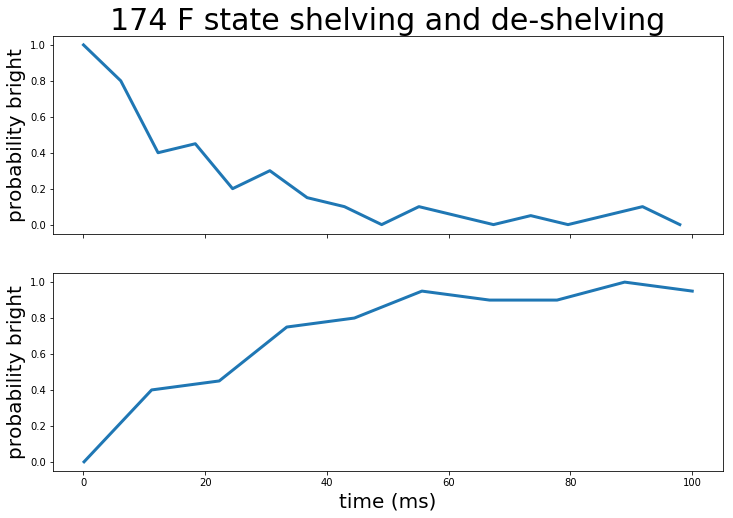

In [30]:
plt.figure(1, figsize=(12,8))
ax1 = plt.subplot(212)
plt.plot(data_1[:,0], data_1[:,1], linewidth=3)
plt.xlabel('time (ms)', fontsize=20)
plt.ylabel('probability bright', fontsize=20)
ax2 = plt.subplot(211, sharex=ax1)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.plot(data_2[0::3,0], data_2[0::3,1], linewidth=3)
plt.ylabel('probability bright', fontsize=20)
plt.title('174 F state shelving and de-shelving', fontsize=30)
plt.savefig('/home/qsimexpcontrol/plots/shelving/411_shelving_deshelving.pdf')